# DBSCAN (density based spatial clustering of application with noise)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [3]:
#import dataset
data = pd.read_csv(r'C:\Users\ASUS\Downloads\penguins.csv')

In [4]:
data.head()

,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


In [6]:
data_1=data.drop(columns=['y'])

In [10]:
data_1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,55.8,19.8,207.0,4000.0
338,43.5,18.1,202.0,3400.0
339,49.6,18.2,193.0,3775.0
340,50.8,19.0,210.0,4100.0


In [11]:
#NORMALIZING DATA USING STANDARDSCALER
dataScaled= StandardScaler().fit_transform(data_1)

In [12]:
dataScaled

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

In [18]:
dataScaled_df= pd.DataFrame(dataScaled, columns= data_1.columns)

In [19]:
dataScaled_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947
338,-0.077396,0.481175,0.077258,-1.001215
339,1.041543,0.531887,-0.563715,-0.532923
340,1.261662,0.937586,0.647013,-0.127069


In [20]:
#finding the Epsilon values when min points are k=7  WITH THE HELP OF KNN algorithm

knn = NearestNeighbors(n_neighbors= 7)

In [21]:
knn.fit(dataScaled_df)

NearestNeighbors(n_neighbors=7)

In [22]:
dist,ind = knn.kneighbors(dataScaled_df)

In [23]:
#sort the distance
dist = np.sort(dist,axis=0)

In [24]:
dist= dist[:,1]#finding all the min distance

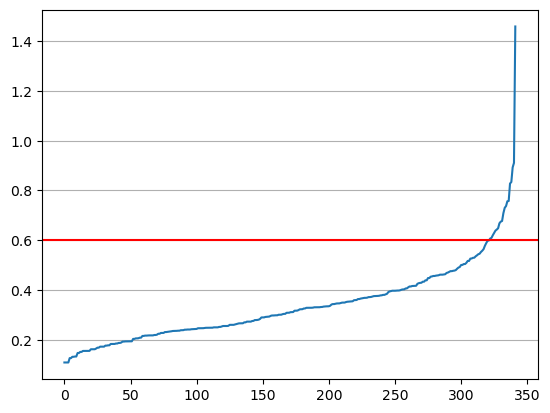

In [25]:
#plot the min dist
plt.plot(dist)
plt.grid(axis='y')
plt.axhline(y=0.6, color='r',ls='-')

In [26]:
#from the above k distance graph we got eps value = 0.6 when the min points are 7

#train the DBSCAN
dbscan=DBSCAN(eps=0.6,min_samples=7)

In [27]:
dbscan.fit(dataScaled_df)

DBSCAN(eps=0.6, min_samples=7)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

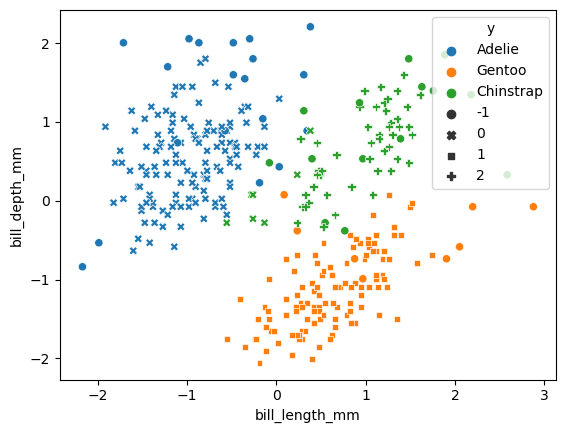

In [28]:
#visualize the cluster
sns.scatterplot(dataScaled_df['bill_length_mm'],dataScaled_df['bill_depth_mm'],hue=y,style=dbscan.labels_)